In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

## **Data Preprocessing**

In [2]:
df = pd.read_csv('delhi_aqi.csv')
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [3]:
df.shape

(18776, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18776 non-null  datetime64[ns]
 1   co      18776 non-null  float64       
 2   no      18776 non-null  float64       
 3   no2     18776 non-null  float64       
 4   o3      18776 non-null  float64       
 5   so2     18776 non-null  float64       
 6   pm2_5   18776 non-null  float64       
 7   pm10    18776 non-null  float64       
 8   nh3     18776 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.3 MB


In [7]:
df.isna().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [8]:
pollutant_columns = df.columns.drop('date')
df[pollutant_columns].describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_the_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

In [10]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day_of_the_week,hour
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020,11,Wednesday,1
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020,11,Wednesday,2
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020,11,Wednesday,3
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020,11,Wednesday,4
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020,11,Wednesday,5


## **EDA and Visualization**

In [11]:
monthly_avg = df.groupby('month')[['pm2_5', 'pm10']].mean().reset_index()

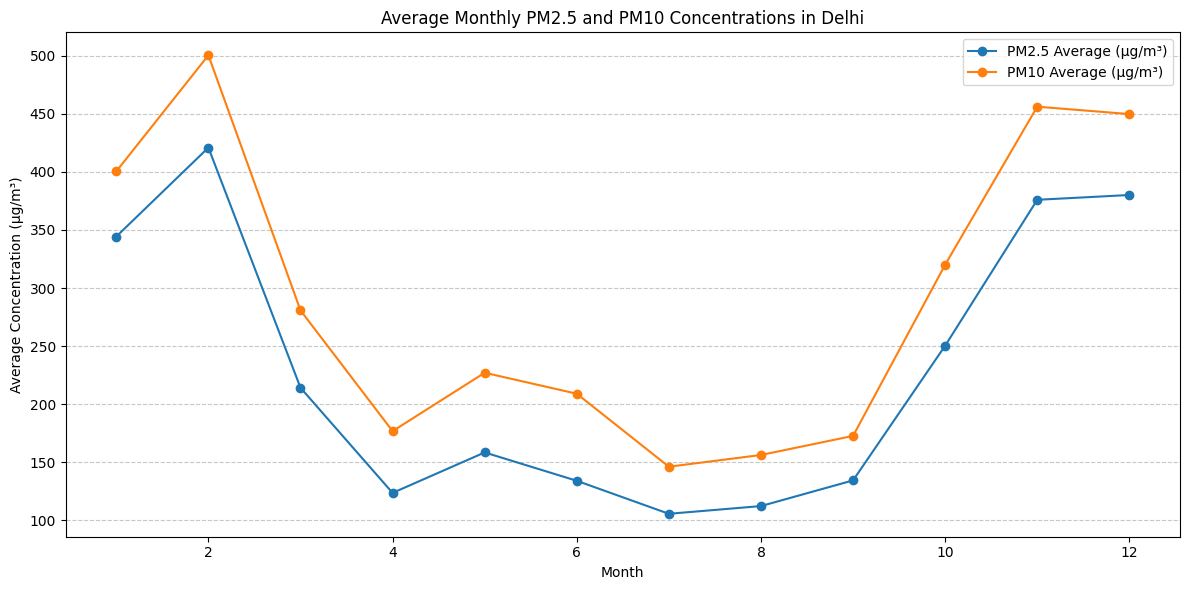

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['month'], monthly_avg['pm2_5'], marker='o', label='PM2.5 Average (µg/m³)')
plt.plot(monthly_avg['month'], monthly_avg['pm10'], marker='o', label='PM10 Average (µg/m³)')

# Add labels and title
plt.title('Average Monthly PM2.5 and PM10 Concentrations in Delhi')
plt.xlabel('Month')
plt.ylabel('Average Concentration (µg/m³)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

In [13]:
hourly_avg = df.groupby('hour')[['pm2_5', 'pm10']].mean().reset_index()

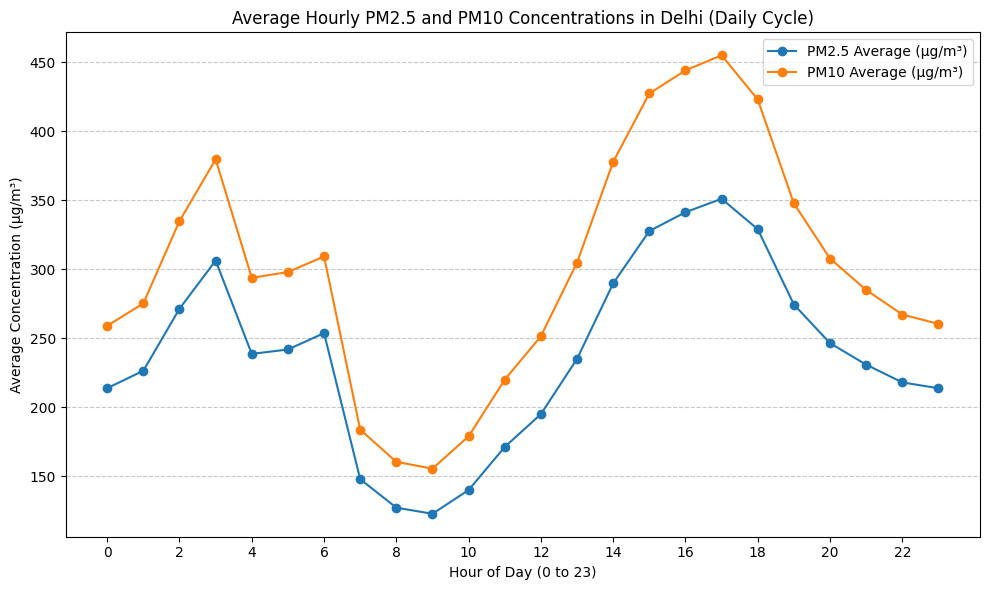

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg['hour'], hourly_avg['pm2_5'], marker='o', linestyle='-', label='PM2.5 Average (µg/m³)')
plt.plot(hourly_avg['hour'], hourly_avg['pm10'], marker='o', linestyle='-', label='PM10 Average (µg/m³)')

# Add labels and title
plt.title('Average Hourly PM2.5 and PM10 Concentrations in Delhi (Daily Cycle)')
plt.xlabel('Hour of Day (0 to 23)')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(range(0, 24, 2)) # Show every 2 hours
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

In [15]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_avg = df.groupby('day_of_the_week')[['pm2_5', 'pm10']].mean().reindex(day_order).reset_index()

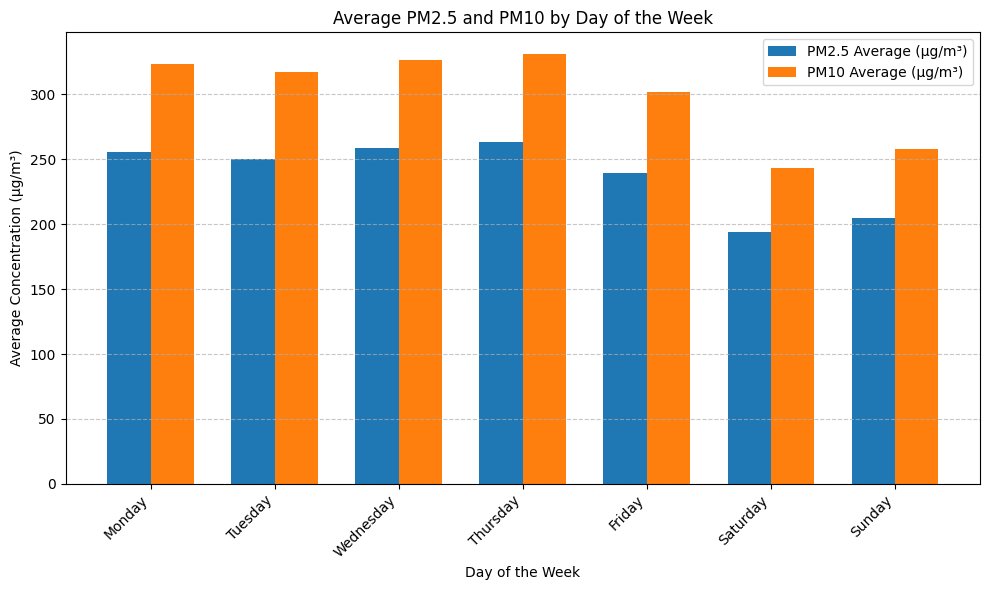

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(day_order))

# Plot bars for PM2.5 and PM10 side-by-side
ax.bar([i - bar_width/2 for i in x], day_of_week_avg['pm2_5'], bar_width, label='PM2.5 Average (µg/m³)')
ax.bar([i + bar_width/2 for i in x], day_of_week_avg['pm10'], bar_width, label='PM10 Average (µg/m³)')

# Add labels and title
ax.set_title('Average PM2.5 and PM10 by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Concentration (µg/m³)')
ax.set_xticks(x)
ax.set_xticklabels(day_order, rotation=45, ha="right")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

## **Corelation Analysis**

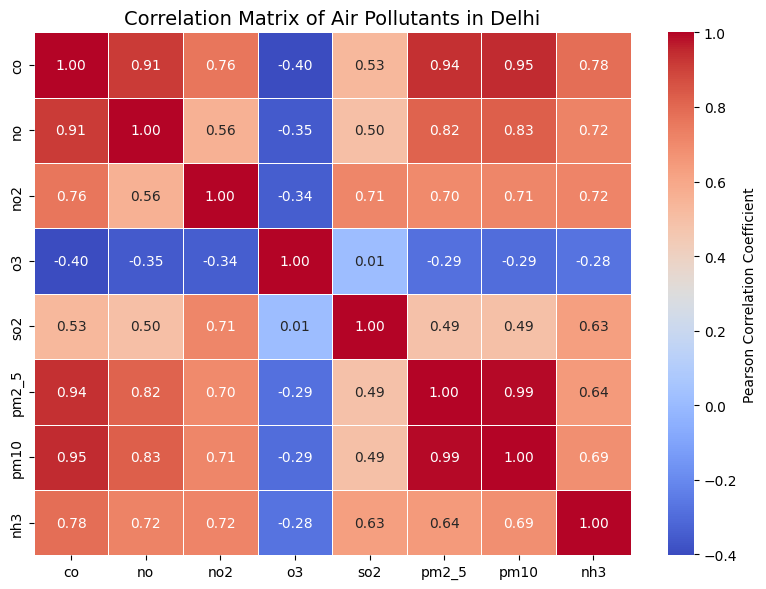

In [17]:
pollutant_columns = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
pollutant_df = df[pollutant_columns].copy()

correlation_matrix = pollutant_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Pearson Correlation Coefficient'}
)

plt.title('Correlation Matrix of Air Pollutants in Delhi', fontsize=14)
plt.tight_layout()

## **AQI**

In [18]:
PM25_BREAKPOINTS = [
    (0, 30, 0, 50), (30, 60, 50, 100), (60, 90, 100, 200), (90, 120, 200, 300), 
    (120, 250, 300, 400), (250, 350, 400, 500)
]
PM10_BREAKPOINTS = [
    (0, 50, 0, 50), (50, 100, 50, 100), (100, 250, 100, 200), (250, 350, 200, 300),
    (350, 430, 300, 400), (430, 500, 400, 500)
]

# AQI Calculation Function (Linear Interpolation)
def calculate_sub_aqi(concentration, breakpoints):
    """Calculates sub-AQI using linear interpolation based on CPCB breakpoints."""
    if pd.isna(concentration) or concentration < 0:
        return np.nan
    
    for B_Lo, B_Hi, I_Lo, I_Hi in breakpoints:
        if concentration >= B_Lo and concentration <= B_Hi:
            if B_Hi == B_Lo:
                 return I_Hi
            sub_aqi = ((I_Hi - I_Lo) / (B_Hi - B_Lo)) * (concentration - B_Lo) + I_Lo
            return sub_aqi
        elif concentration > breakpoints[-1][1]:
            # If concentration exceeds the highest breakpoint, cap AQI at 500
            return 500
            
    return np.nan

In [19]:
# Calculate Sub-AQI for PM2.5 and PM10
df['aqi_pm25'] = df['pm2_5'].apply(lambda x: calculate_sub_aqi(x, PM25_BREAKPOINTS))
df['aqi_pm10'] = df['pm10'].apply(lambda x: calculate_sub_aqi(x, PM10_BREAKPOINTS))

# Overall AQI is the maximum sub-index
df['overall_aqi'] = df[['aqi_pm25', 'aqi_pm10']].max(axis=1)

In [20]:
def categorize_aqi(aqi):
    if aqi <= 50: return 'Good (0-50)'
    elif aqi <= 100: return 'Satisfactory (51-100)'
    elif aqi <= 200: return 'Moderate (101-200)'
    elif aqi <= 300: return 'Poor (201-300)'
    elif aqi <= 400: return 'Very Poor (301-400)'
    else: return 'Severe (>400)'

In [21]:
df['aqi_category'] = df['overall_aqi'].apply(categorize_aqi)

# Analysis: Count the frequency of each AQI category
aqi_counts = df['aqi_category'].value_counts().reset_index()
aqi_counts.columns = ['AQI Category', 'Count (Hourly)']

# Define the correct order for plotting (Worst to Best or Best to Worst)
category_order = ['Good (0-50)', 'Satisfactory (51-100)', 'Moderate (101-200)', 'Poor (201-300)', 'Very Poor (301-400)', 'Severe (>400)']
aqi_counts['AQI Category'] = pd.Categorical(aqi_counts['AQI Category'], categories=category_order, ordered=True)
aqi_counts = aqi_counts.sort_values('AQI Category').reset_index(drop=True)

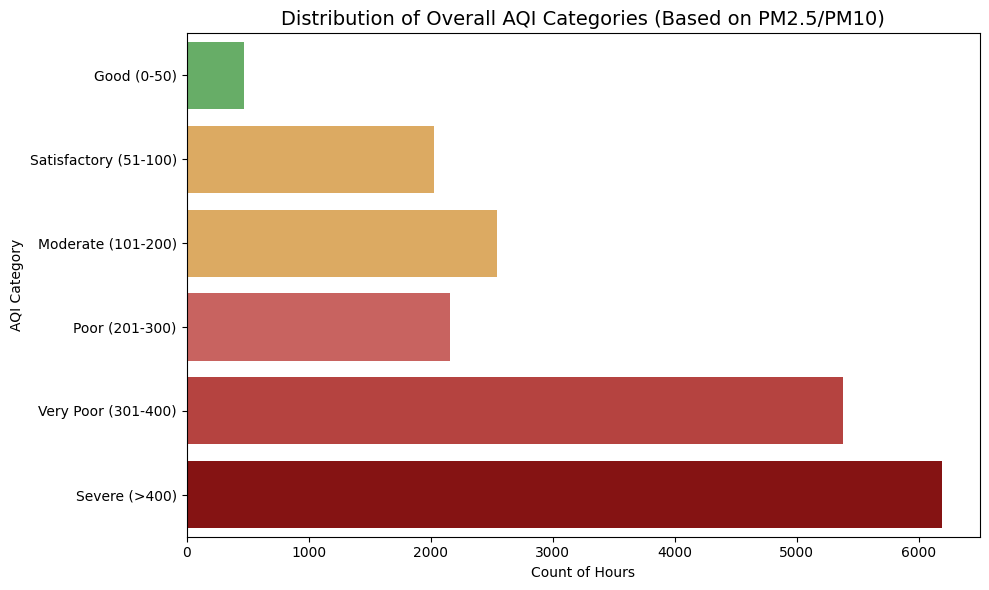

In [22]:
# Plot the distribution of AQI categories
plt.figure(figsize=(10, 6))
# Define a custom color palette for AQI categories (Green to Deep Red)
aqi_colors = ['#5cb85c', '#f0ad4e', '#f0ad4e', '#d9534f', '#c9302c', '#980000']
sns.barplot(
    x='Count (Hourly)', 
    y='AQI Category', 
    data=aqi_counts, 
    palette=sns.color_palette(aqi_colors)
)
plt.title('Distribution of Overall AQI Categories (Based on PM2.5/PM10)', fontsize=14)
plt.xlabel('Count of Hours')
plt.ylabel('AQI Category')
plt.tight_layout()

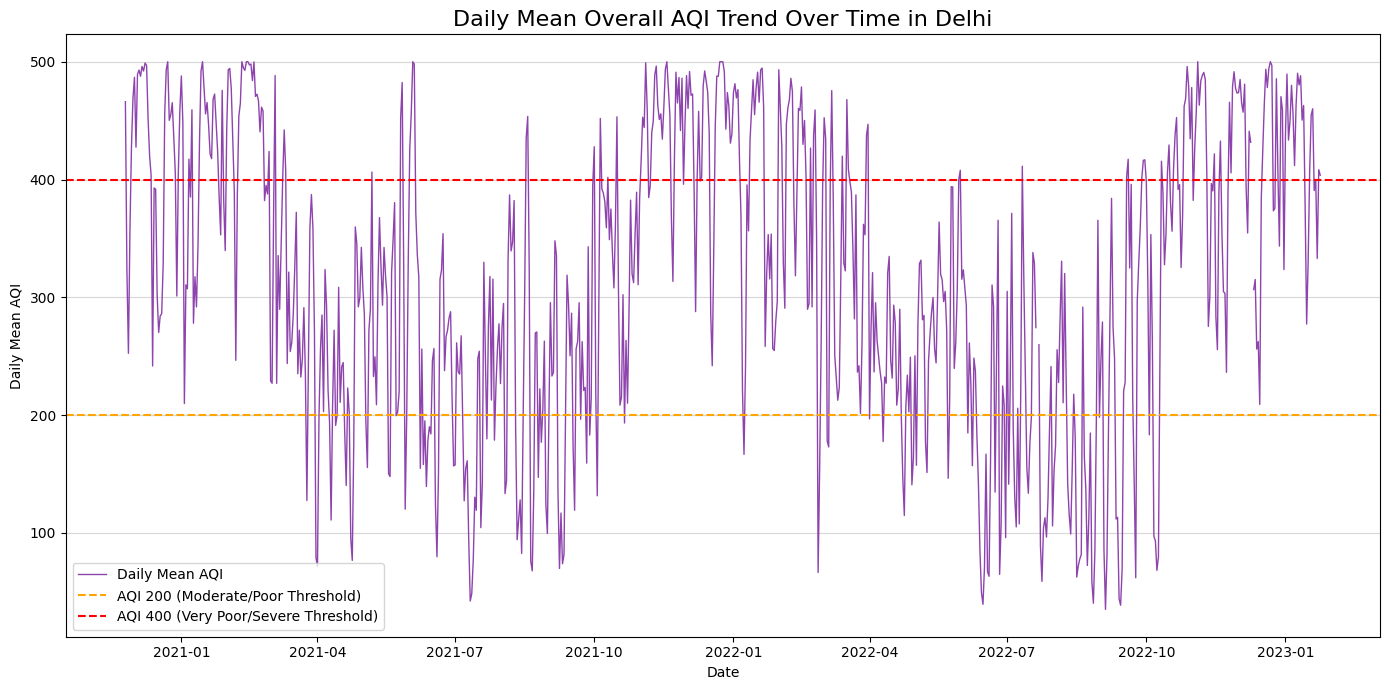

In [23]:
# Set 'date' as index for resampling. Use .copy() to avoid SettingWithCopyWarning if df was a slice
df_resample = df.set_index('date').copy()

# Resample to Daily Mean AQI
daily_aqi = df_resample['overall_aqi'].resample('D').mean()

# Reset index for plotting
daily_aqi = daily_aqi.reset_index()

plt.figure(figsize=(14, 7))
plt.plot(daily_aqi['date'], daily_aqi['overall_aqi'], label='Daily Mean AQI', color='#8E44AD', linewidth=1)

# Add threshold lines for visual context (e.g., AQI=200 Moderate/Poor threshold)
plt.axhline(y=200, color='orange', linestyle='--', label='AQI 200 (Moderate/Poor Threshold)')
plt.axhline(y=400, color='red', linestyle='--', label='AQI 400 (Very Poor/Severe Threshold)')

plt.title('Daily Mean Overall AQI Trend Over Time in Delhi', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Daily Mean AQI')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

## **KPIs**

Generating KPI Dashboard Plot...


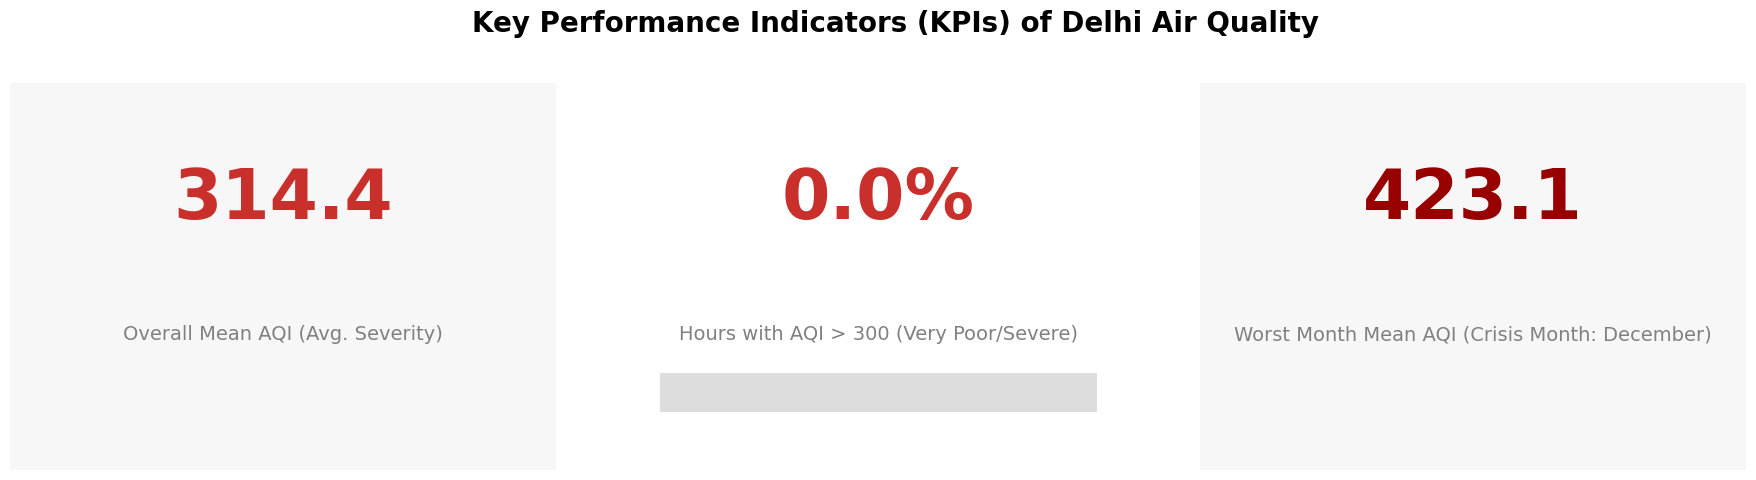

In [26]:
import calendar
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle


df = pd.read_csv("delhi_aqi.csv")
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['aqi_pm25'] = df['pm2_5'].apply(lambda x: calculate_sub_aqi(x, PM25_BREAKPOINTS))
df['aqi_pm10'] = df['pm10'].apply(lambda x: calculate_sub_aqi(x, PM10_BREAKPOINTS))
df['overall_aqi'] = df[['aqi_pm25', 'aqi_pm10']].max(axis=1)
df['aqi_category'] = df['overall_aqi'].apply(categorize_aqi)

# --- KPI Calculations ---
mean_aqi = df['overall_aqi'].mean()

severe_very_poor_hours = df[df['aqi_category'].isin(['Severe', 'Very Poor'])].shape[0]
total_hours = df.shape[0]
severe_very_poor_percentage = (severe_very_poor_hours / total_hours) * 100

monthly_mean = df.groupby('month')['overall_aqi'].mean()
worst_month_num = monthly_mean.idxmax()
worst_month_mean_aqi = monthly_mean.max()
worst_month_name = calendar.month_name[worst_month_num]

# Determine color for the Mean AQI label based on its value
def get_aqi_color(aqi):
    if aqi <= 50: return '#5cb85c'  # Good (Green)
    elif aqi <= 100: return '#f0ad4e' # Satisfactory/Moderate (Yellow/Light Orange)
    elif aqi <= 200: return '#f0ad4e' # Moderate (Yellow/Light Orange)
    elif aqi <= 300: return '#d9534f' # Poor (Orange-Red)
    elif aqi <= 400: return '#c9302c' # Very Poor (Dark Red)
    else: return '#980000' # Severe (Deep Red)

mean_aqi_color = get_aqi_color(mean_aqi)

# --- NEW: KPI Dashboard Plot ---
print("Generating KPI Dashboard Plot...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Key Performance Indicators (KPIs) of Delhi Air Quality', fontsize=20, fontweight='bold')

# --- KPI 1: Overall Mean AQI ---
ax1 = axes[0]
ax1.set_facecolor('#f7f7f7')
ax1.text(0.5, 0.7, f"{mean_aqi:.1f}", ha='center', va='center', fontsize=50, color=mean_aqi_color, fontweight='bold')
ax1.text(0.5, 0.35, "Overall Mean AQI (Avg. Severity)", ha='center', va='center', fontsize=14, color='gray')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

# --- KPI 2: Percentage of Severe/Very Poor Hours ---
ax2 = axes[1]
percentage_color = '#c9302c' # Always dark red for high percentage of bad air
ax2.text(0.5, 0.7, f"{severe_very_poor_percentage:.1f}%", ha='center', va='center', fontsize=50, color=percentage_color, fontweight='bold')
ax2.text(0.5, 0.35, "Hours with AQI > 300 (Very Poor/Severe)", ha='center', va='center', fontsize=14, color='gray')

# Add a progress bar graphic
rect_width = 0.8
rect_height = 0.1
rect_y = 0.15
ax2.add_patch(Rectangle((0.1, rect_y), rect_width, rect_height, facecolor='#ddd'))
ax2.add_patch(Rectangle((0.1, rect_y), rect_width * (severe_very_poor_percentage / 100), rect_height, facecolor=percentage_color))
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)

# --- KPI 3: Worst Month Mean AQI ---
ax3 = axes[2]
ax3.set_facecolor('#f7f7f7')
worst_month_color = get_aqi_color(worst_month_mean_aqi)
ax3.text(0.5, 0.7, f"{worst_month_mean_aqi:.1f}", ha='center', va='center', fontsize=50, color=worst_month_color, fontweight='bold')
ax3.text(0.5, 0.35, f"Worst Month Mean AQI (Crisis Month: {worst_month_name})", ha='center', va='center', fontsize=14, color='gray')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.savefig('kpi_dashboard_plot.png')